In [4]:
# looking over annotations ------------------------------------------------------------------------------------
# In pig 5 the microtrend failed to work.  Shortly before that point the resuscitation algorithm had changed so that 
    # it wasn't needed but there was still code in it that expected values to be there.  So the resuscitation code was
    # crashing on that.  I needed to remove the code that depended on the pCO2 values and then restart the system.  
    # Thus there are two sessions, one that leads up to the resuscitation and one that goes from when the resuscitation starts.

# for pig in ['pig_06_20200922_084158']: # additional annotation: Irvin Pierskalla collected PCO2 data from three devices during yesterday's 
    # pig study.  The data from our linked device was useless. However, the CVS file attached from one of the two other
    # probes gave excellent trending data. The first 45 minutes is actually human data, Irvin but the probe in his 
    # own mouth to make sure it was accurate! Then we switched it into the pig. I believe the time is one hour off as 
    # he was using Central Time. Still, the change sin PCO2 trend nicely baseline, bleed, wait and resuscitation phases.       Please add this file to the #6 pig data file and delete the PCO2 one already there or mark it "bad data".

# for pig in ['pig_07_20200924_084150']: # just a formatting issue with \'

# for pig in ['pig_08_20201013_080142']: # just differnt spacing

# for pig in ['pig_13_03252021_501_20210325_082946']: # just " instead of ' 

# for pig in ['pig_14_20210330_113521']: # just a formatting issue with \'

# In pig 16, the device that records the timing synchronization data for the Braedius camera/laptop wasn't working.  
    # In the supplemental session, I have that "working".  (I say "working" because I just found out that I wasn't 
    # sending all of the synchronization time bits and it now becomes a puzzle to decode the times stored in 
    # "daq.Clicktrack") The supplemental session starts only after resuscitation has completely finished. Many of 
    # the devices were already shutdown by the time I created a new session and the session only lasts for
    # about 12 minutes or so

# 1st 12 pigs getting norep delayed first .5ml, after fixed
# 1,2,3 came close to failure
# dobutamine was available but perhaps not used in pigs 1-14

import os

path = '/zfsauton/data/public/xinyul2/PigBleed/2020/'

for pig in sorted(os.listdir(path+'sessions/')):

    if pig in ['pig_04_20200908_101618', 'pig_05_20200910_095434', 'pig_16_20210518_184343_supplemental']: continue
    print(pig)
    print('processing file:', path+'sessions/'+pig+'/logs/logfile_debug.log')
    file1 = open(path+'sessions/'+pig+'/logs/logfile_debug.log', 'r')
    lines = file1.readlines()
    
    annotations1 = [l for l in lines if 'Adding annotation' in l]
        
    file1 = open(path+'sessions/'+pig+'/annotations.txt', 'r')
    lines = file1.readlines()
    annotations2 = [l for l in lines if 'text' in l]
    annotations2 = [l.replace("\"", "\'").replace('    ','').replace('\n','') for l in annotations2]
#     for a in annotations1:
#         print(a)
#     for a in annotations2:
#         print(a)
        
    print(len(annotations1)==len(annotations2), len(annotations1), len(annotations2))
    for i in range(len(annotations1)):
        print(annotations2[i] in annotations1[i])
        if annotations2[i] not in annotations1[i]:
            print(annotations2[i])
            print(annotations1[i])
#     break



pig_01_20200318_143625
processing file: /zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_01_20200318_143625/logs/logfile_debug.log
True 8 8
True
True
True
True
True
True
True
True
pig_02
processing file: /zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_02/logs/logfile_debug.log
True 10 10
True
True
True
True
True
True
True
True
True
True
pig_03_20200825_083856
processing file: /zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_03_20200825_083856/logs/logfile_debug.log
True 1 1
True
pig_05_20200910_150930
processing file: /zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_05_20200910_150930/logs/logfile_debug.log
True 5 5
True
True
True
True
True
pig_06_20200922_084158
processing file: /zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_06_20200922_084158/logs/logfile_debug.log
False 12 13
True
True
True
True
True
True
True
True
True
True
True
True
pig_07_20200924_084150
processing file: /zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_07_2020092

In [2]:
# looking over annotations ------------------------------------------------------------------------------------
import os
import glob

path = '/zfsauton/data/public/xinyul2/PigBleed/2020/'

pig_nums = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', 
            '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
paths = [sorted(glob.glob(path+"sessions/pig_"+p+"*")) for p in pig_nums]
pig_logs = {}

for num, path in zip(pig_nums, paths):
    print('pig', num, path)
    pig_logs[num] = []
    for p in path:
        file1 = open(p+'/logs/logfile_debug.log', 'r')
        lines = file1.readlines()
        pig_logs[num].extend(lines)

        print('len of logs', len(pig_logs[num]))
    
    err1 = [l for l in pig_logs[num] if ('ERROR' in l ) and (('devices.pumps.neurowave' in l) or ('devices.neurowave.pump' in l))]
    if len(err1) > 0:
        print('Example Error', err1[0])
#     err1 = [' '.join(l.split(' ')[1:3]) for l in err1]
#     print(len(err1))
        

# for pig in ['pig_05_20200910_095434', 'pig_05_20200910_150930']:
# for pig in ['pig_16_20210518_184343_supplemental', 'pig_16_20210518_081155']:
#     print('processing file:', path+'sessions/'+pig+'/logs/logfile_debug.log')
#     file1 = open(path+'sessions/'+pig+'/logs/logfile_debug.log', 'r')
#     lines = file1.readlines()
    
#     annotations1 = [l for l in lines if 'Adding annotation' in l]
        
# #     file1 = open(path+'sessions/'+pig+'/annotations.txt', 'r')
# #     lines = file1.readlines()
# #     annotations2 = [l for l in lines if 'text' in l]
# #     annotations2 = [l.replace("\"", "\'").replace('    ','').replace('\n','') for l in annotations2]
#     for a in annotations1:
#         print(a)
# #     for a in annotations2:
# #         print(a)
        
# #     print(len(annotations1)==len(annotations2), len(annotations1), len(annotations2))
# #     for i in range(len(annotations1)):
# #         print(annotations2[i] in annotations1[i])
# #         if annotations2[i] not in annotations1[i]:
# #             print(annotations2[i])
# #             print(annotations1[i])
# # #     break



pig 01 ['/zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_01_20200318_143625']
len of logs 3438
pig 02 ['/zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_02']
len of logs 3975
Example Error devices.pumps.neurowave.fluid 2020-03-19 10:02:17,692: [ERROR] prime status invalid

pig 03 ['/zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_03_20200825_083856']
len of logs 28153
Example Error devices.neurowave.pump.fluid 2020-08-25 08:39:42,911: [ERROR] prime status invalid

pig 04 ['/zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_04_20200908_101618']
len of logs 26106
Example Error devices.neurowave.pump.fluid 2020-09-08 15:17:47,844: [ERROR] motor voltage exceeds limits

pig 05 ['/zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_05_20200910_095434', '/zfsauton/data/public/xinyul2/PigBleed/2020/sessions/pig_05_20200910_150930']
len of logs 8780
len of logs 61908
Example Error devices.neurowave.pump.fluid 2020-09-10 09:54:56,285: [ERROR] prime status inval

In [4]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import os

h5_paths = "/zfsauton/data/public/vleonard/tracir/auv_files/"
paths = os.listdir(h5_paths)
paths.remove('p06_microtrend_data.xlsx')
paths = sorted(paths)
print(paths)

path_dict = {path: {} for path in paths}

for path in paths:
    f = h5py.File(h5_paths+path, 'r')
    print(f.keys())
    
    try:
        pump_fluid = pd.DataFrame(f['pump.fluid'][()])
        print(pump_fluid.columns, pump_fluid.dtypes)
        path_dict['path']['pump.fluid'] = pump_fluid.timestamp.values[1:]-pump_fluid.timestamp.values[:-1]

        plt.figure(1, figsize=(15,5)); plt.clf()
        plt.plot(pump_fluid.timestamp.values[1:]-pump_fluid.timestamp.values[:-1])
        plt.title(path + ' pump.fluid'); plt.show()
    except Exception as e:
        print(e)
    
    try:        
        pump_dobut = pd.DataFrame(f['pump.dobut'][()])
        print(pump_dobut.columns, pump_dobut.dtypes)
        path_dict['path']['pump.dobut'] = pump_dobut.timestamp.values[1:]-pump_dobut.timestamp.values[:-1]

        plt.figure(1, figsize=(15,5)); plt.clf()
        plt.plot(pump_dobut.timestamp.values[1:]-pump_dobut.timestamp.values[:-1])
        plt.title(path + ' pump.dobut'); plt.show()

    except Exception as e:
        print(e)

['p01.h5', 'p02.h5', 'p03.h5', 'p04.h5', 'p05.h5', 'p06.h5', 'p07.h5', 'p08.h5', 'p09.h5', 'p10.h5', 'p11.h5', 'p12.h5', 'p13.h5', 'p14.h5', 'p15.h5', 'p16.h5', 'p17.h5', 'p18.h5', 'p19.h5', 'p20.h5']
<KeysViewHDF5 ['PatientRecord', 'accel.pumps', 'accel.table', 'accel.xducers', 'daq', 'daq_raw', 'lidco', 'microtrend', 'pump.blood', 'pump.blood_raw', 'pump.fluid', 'pump.norepi']>
Index(['timestamp', 'rate', 'drugConcentration', 'requestedVol', 'netVol',
       'action'],
      dtype='object') timestamp            float64
rate                 float32
drugConcentration    float32
requestedVol         float32
netVol               float32
action                 int32
dtype: object
'path'
"Unable to open object (object 'pump.dobut' doesn't exist)"
<KeysViewHDF5 ['PatientRecord', 'accel.pumps', 'accel.table', 'accel.xducers', 'daq', 'daq_raw', 'lidco', 'microtrend', 'pump.blood', 'pump.blood_raw', 'pump.fluid', 'pump.norepi']>
Index(['timestamp', 'rate', 'drugConcentration', 'requestedVol', 

Index(['timestamp', 'rate', 'drugConcentration', 'requestedVol', 'netVol',
       'action'],
      dtype='object') timestamp            float64
rate                 float32
drugConcentration    float32
requestedVol         float32
netVol               float32
action                 int32
dtype: object
'path'
<KeysViewHDF5 ['PatientRecord', 'accel.pumps', 'accel.table', 'accel.xducers', 'daq', 'daq_raw', 'lidco', 'microtrend', 'pump.blood', 'pump.blood_inf', 'pump.blood_raw', 'pump.dobut', 'pump.fluid', 'pump.norepi', 'starling']>
Index(['timestamp', 'rate', 'drugConcentration', 'requestedVol', 'netVol',
       'action'],
      dtype='object') timestamp            float64
rate                 float32
drugConcentration    float32
requestedVol         float32
netVol               float32
action                 int32
dtype: object
'path'
Index(['timestamp', 'rate', 'drugConcentration', 'requestedVol', 'netVol',
       'action'],
      dtype='object') timestamp            float64
rate      

['p01.h5', 'p02.h5', 'p03.h5', 'p04.h5', 'p05.h5', 'p06.h5', 'p07.h5', 'p08.h5', 'p09.h5', 'p10.h5', 'p11.h5', 'p12.h5', 'p13.h5', 'p14.h5', 'p15.h5', 'p16.h5', 'p17.h5', 'p18.h5', 'p19.h5', 'p20.h5']
<KeysViewHDF5 ['PatientRecord', 'accel.pumps', 'accel.table', 'accel.xducers', 'daq', 'daq_raw', 'lidco', 'microtrend', 'pump.blood', 'pump.blood_raw', 'pump.fluid', 'pump.norepi']>


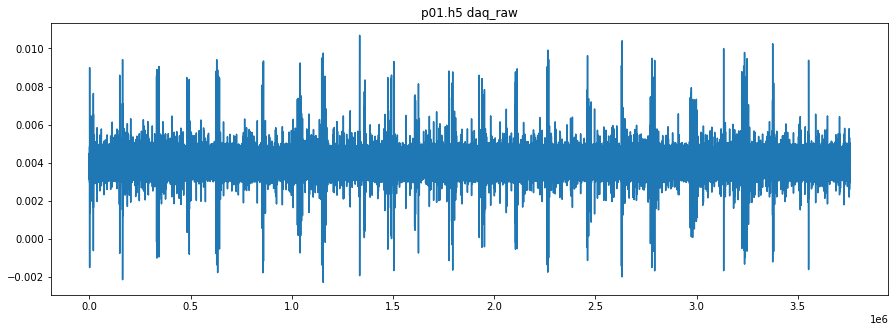

In [8]:
h5_paths = "/zfsauton/data/public/vleonard/tracir/auv_files/"
paths = os.listdir(h5_paths)
paths.remove('p06_microtrend_data.xlsx')
paths = sorted(paths)
print(paths)

path_dict = {path: {} for path in paths}

for path in paths:
    f = h5py.File(h5_paths+path, 'r')
    print(f.keys())
    raw = pd.DataFrame(f['daq_raw'][()])
    plt.figure(1, figsize=(15,5)); plt.clf()
    plt.plot(raw.timestamp.values[1:]-raw.timestamp.values[:-1])
    plt.title(path + ' daq_raw'); plt.show()

    break


# # from pyod.models.copod import COPOD
# # clf = COPOD()
# # clf.fit(X_train)
# wv_features = ['ART', 'CVP', 'PAP', 'SpO2', 'Pleth', 'ECG', 'CCO', 'SvO2', 'AirPr']
# for i, pig in enumerate(list(ts.keys())[-5:]):
#     h5file = h5py.File(path + '/aud_files/p{}.h5'.format(pig), mode='r')
#     t0, t1 = ts[pig]['baseline_start'], ts[pig]['resuscitate_stop']
#     # waveform data
#     if 'daq' in h5file.keys():
#         d = pd.DataFrame(h5file['daq'][()])
#         if t1 is None: # the resuscitation stop time for pig 04 is missing
#             d = d.loc[(d['timestamp'] >= t0)]
#         else:
#             d = d.loc[(d['timestamp'] >= t0) & (d['timestamp'] <= t1)]
#         d = d[['timestamp'] + wv_features]
#         d.to_csv('./data/waveform/' + pig + '.csv', index=False)
#     # lidco data
#     if 'lidco' in h5file.keys():
#         d = pd.DataFrame(h5file['lidco'][()])
#         if t1 is None:
#             d = d.loc[(d['timestamp'] >= t0)]
#         else:
#             d = d.loc[(d['timestamp'] >= t0) & (d['timestamp'] <= t1)]
#         d.to_csv('./data/lidco/' + pig + '.csv', index=False)
#     # starling data
#     if 'starling' in h5file.keys():
#         d = pd.DataFrame(h5file['starling'][()])
#         if t1 is None:
#             d = d.loc[(d['timestamp'] >= t0)]
#         else:
#             d = d.loc[(d['timestamp'] >= t0) & (d['timestamp'] <= t1)]
#         d.to_csv('./data/starling/' + pig + '.csv', index=False)
